# 07 Fundamentals of Linear Regression
*This notebook illustrates methods for the application of a linear regression on a dataset*
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

## 2-Dimensional Linear regression

### Define a sample

Text(0, 0, 'Mean(X)=49.5 Std(X)=59.21')

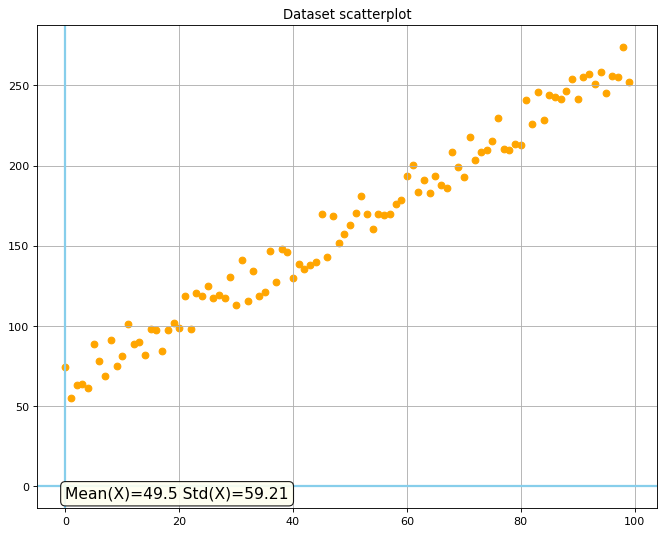

In [2]:
sampledim=100
testsize=0.1
X=np.arange(sampledim).reshape(sampledim,1)
rnd=np.random.random_sample(sampledim).reshape(sampledim,1)
y=50 + 2*X+rnd*30

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y,  color='orange')
plt.title('Dataset scatterplot')

plt.grid()
plt.axhline(linewidth=2, color='skyblue') #evidenzio asse Ox
plt.axvline(linewidth=2, color='skyblue') #evidenzio asse Oy

X_med=np.round(np.mean(X),2)
X_std=np.round(np.std(y),2)

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
textstr = 'Mean(X)='+str(X_med)+' Std(X)='+str(X_std)   
plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)


### Center and scale the sample

Text(0, 0, 'Mean(X)=0.0 Std(X)=1.0')

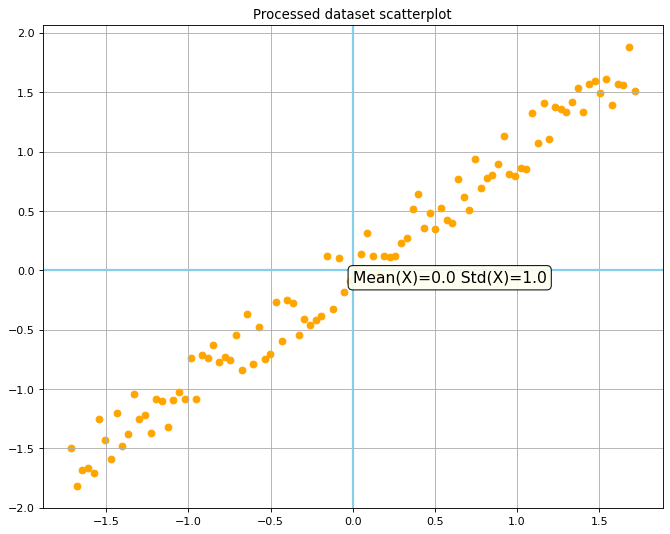

In [3]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)


figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_scaled, y_scaled,  color='orange')
plt.title('Processed dataset scatterplot')

plt.grid()
plt.axhline(linewidth=2, color='skyblue') #evidenzio asse Ox
plt.axvline(linewidth=2, color='skyblue') #evidenzio asse Oy

X_med=np.round(np.mean(X_scaled),2)
X_std=np.round(np.std(X_scaled),2)

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
textstr = 'Mean(X)='+str(X_med)+' Std(X)='+str(X_std)   
plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Define a training and testing set

Text(0, 0, 'Training set=70.0% Testing set=30.0%')

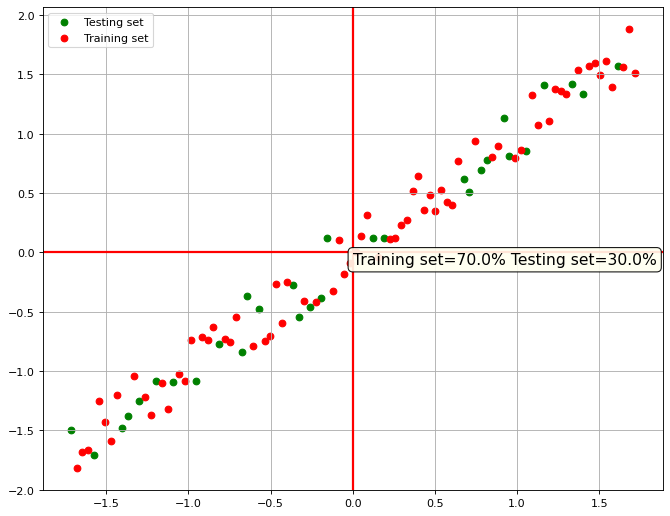

In [4]:
from sklearn.model_selection import train_test_split
testsize=0.30;
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=testsize, random_state=42)

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test,  color='green')
plt.scatter(X_train, y_train,  color='red')
plt.legend(['Testing set','Training set'])

#evidenzio gli assi
plt.grid()
plt.axhline(linewidth=2, color='r') #evidenzio asse Ox
plt.axvline(linewidth=2, color='r') #evidenzio asse Oy

#aggiungo didascalia su percentuale train-test
testDim=np.round(testsize*100,2)
trainDim=np.round((1-testsize)*100,2)

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
textstr = 'Training set='+str(trainDim)+'% Testing set='+str(testDim) +'%'  
plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Fit Ordinary Least Squares

Text(0.1, -1, 'MSE=0.022 \n Beta=[[0.99]]')

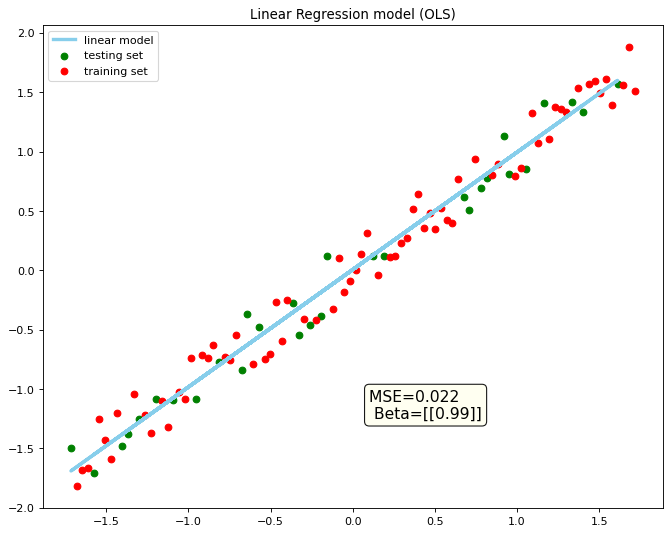

In [5]:
# Fit Ordinary Least Squares: OLS
import sklearn.linear_model as lm
import sklearn.metrics as metrics

#Costruisco regressione lineare sul train-set
regr = lm.LinearRegression()
lr=regr.fit(X_train, y_train)

#Testo la regressione lineare sul test-set
y_pred = lr.predict(X_test)
mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
beta=np.round(regr.coef_,2)



#Traccio il grafico del modello
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test,  color='green')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_test, y_pred, color='skyblue', linewidth=3)
plt.title('Linear Regression model (OLS)')
plt.legend(['linear model','testing set','training set'])

#evidenzio gli assi
#plt.grid()
#plt.axhline(linewidth=2, color='r') #evidenzio asse Ox
#plt.axvline(linewidth=2, color='r') #evidenzio asse Oy

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
textstr = 'MSE='+str(mse)+' \n Beta='+str(beta)   
plt.text(0.1, -1, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Fit Ridge Regression

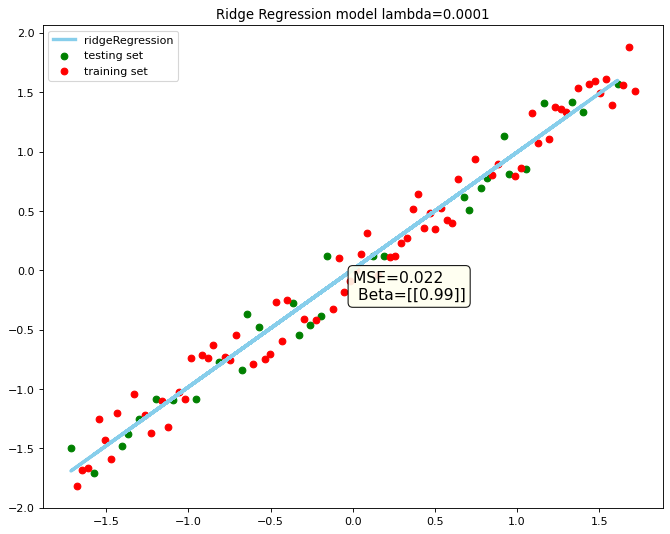

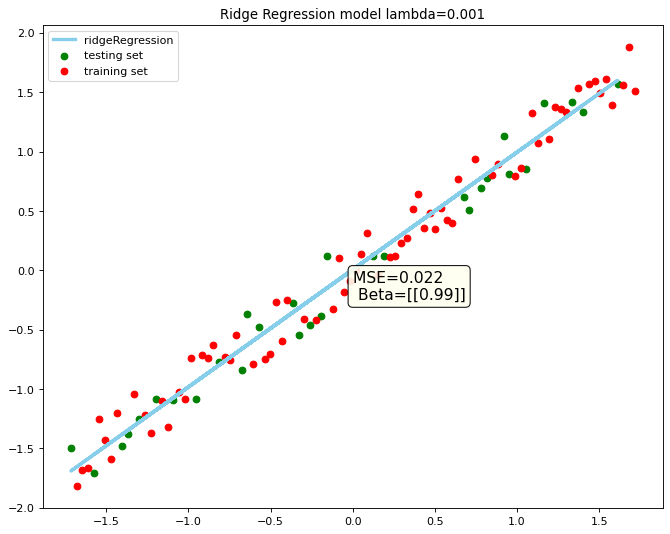

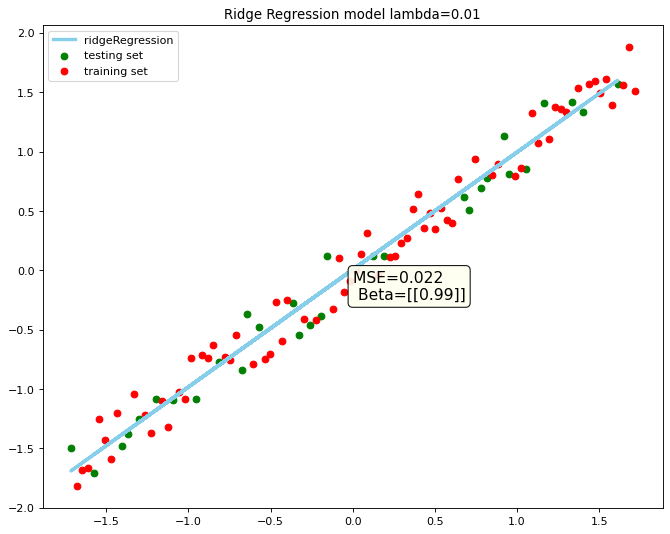

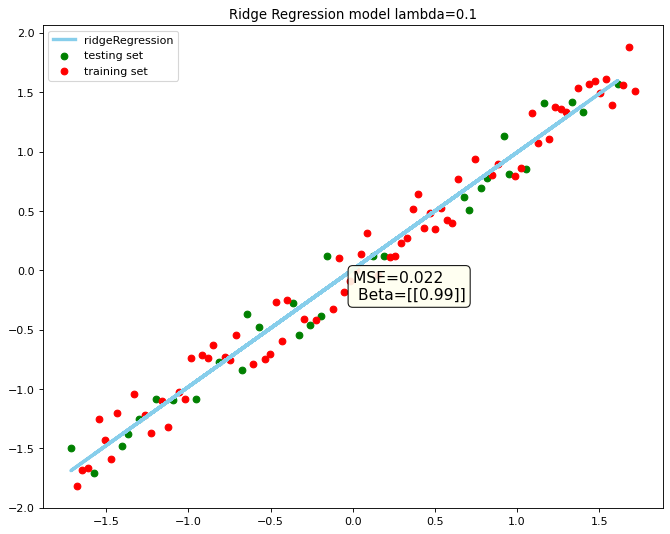

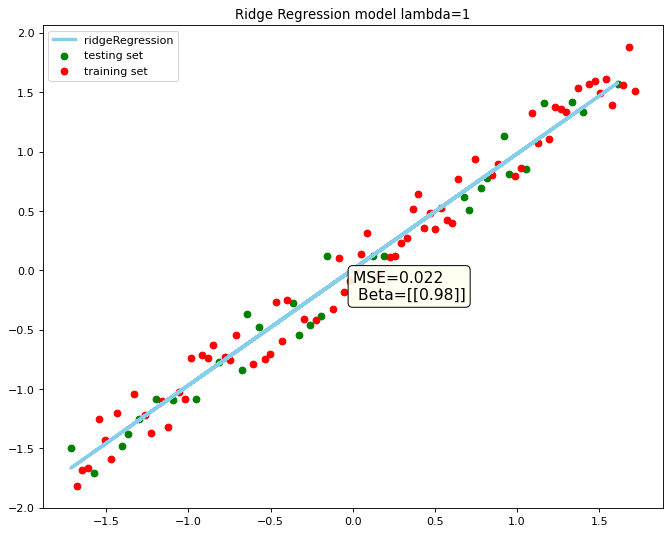

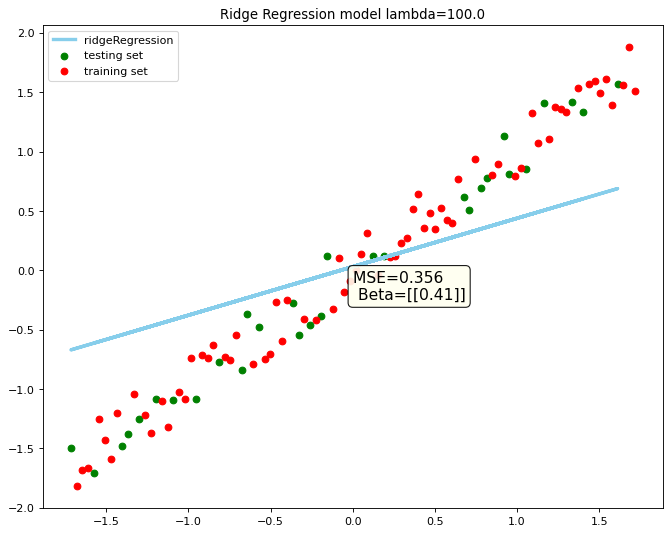

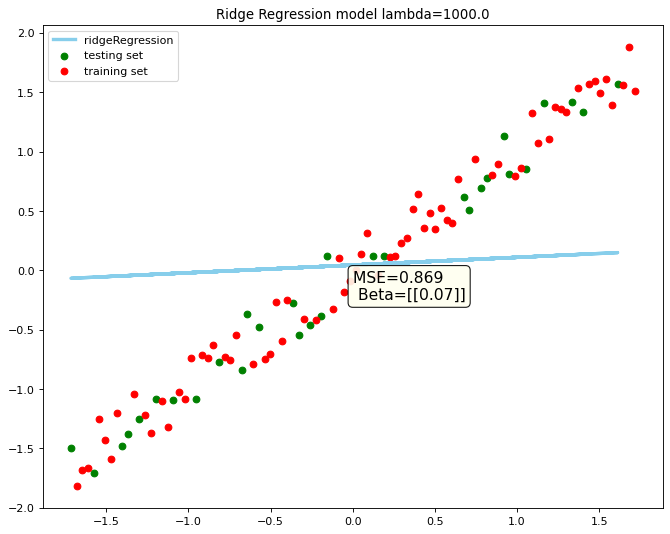

In [6]:
# Fit Ridge Regression (L2)
alpha_ridge = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_ridge)):
    #Costruisco ridge regression sul train-set
    ridge = lm.Ridge(alpha=alpha_ridge[i])
    rr=ridge.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = rr.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
    #print("lambda =", alpha_ridge[i])
    #print("R-squared =", r2)
    #print("Coefficients =", beta)
    

    #Traccio il grafico del modello
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X_test, y_test,  color='green')
    plt.scatter(X_train, y_train,  color='red')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=3)
    plt.title('Ridge Regression model lambda='+str(alpha_ridge[i]))
    plt.legend(['ridgeRegression','testing set','training set'])
    
    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
    textstr = 'MSE='+str(mse)+' \n Beta='+str(beta)   
    plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Fit Lasso regression

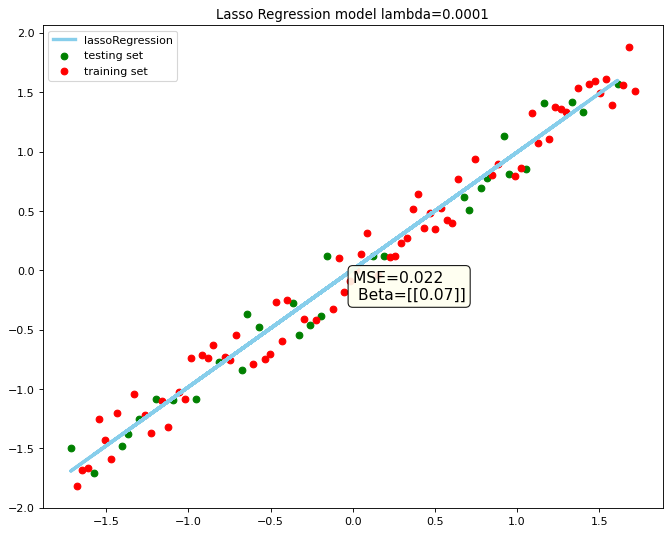

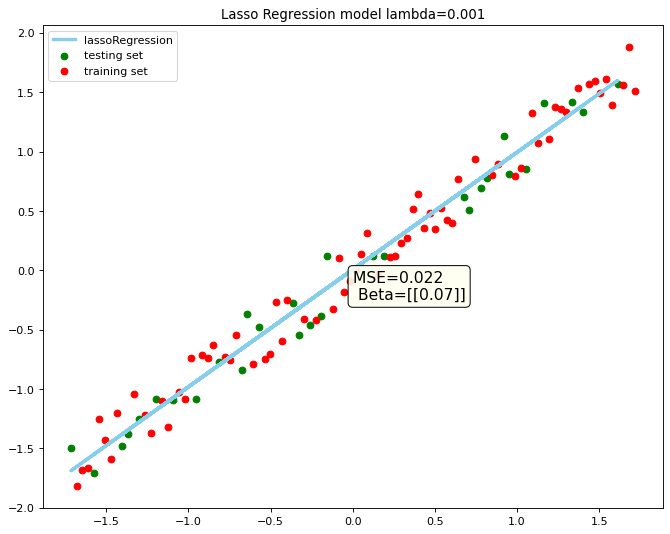

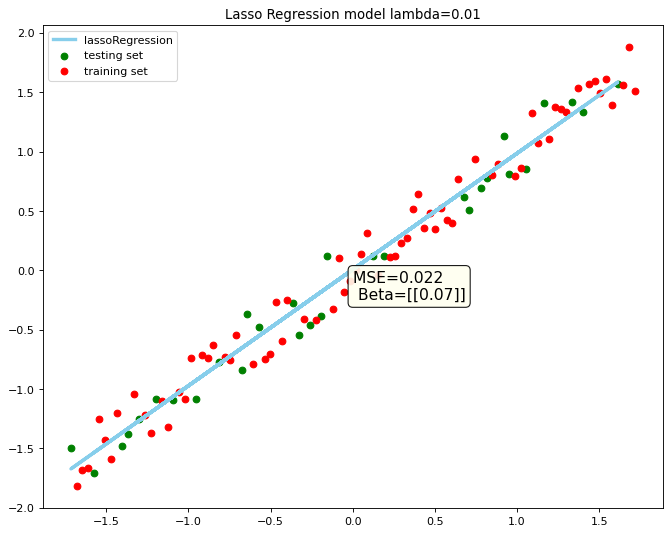

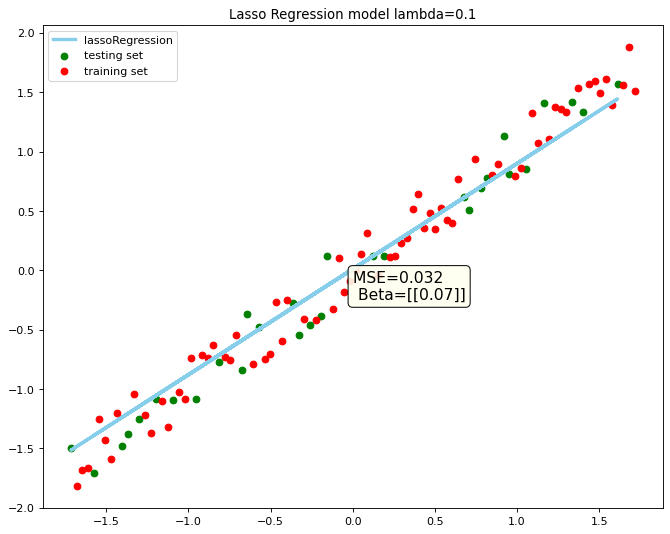

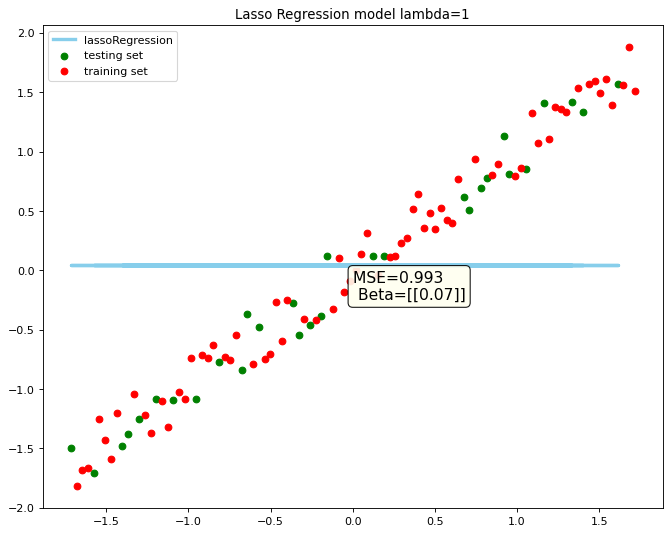

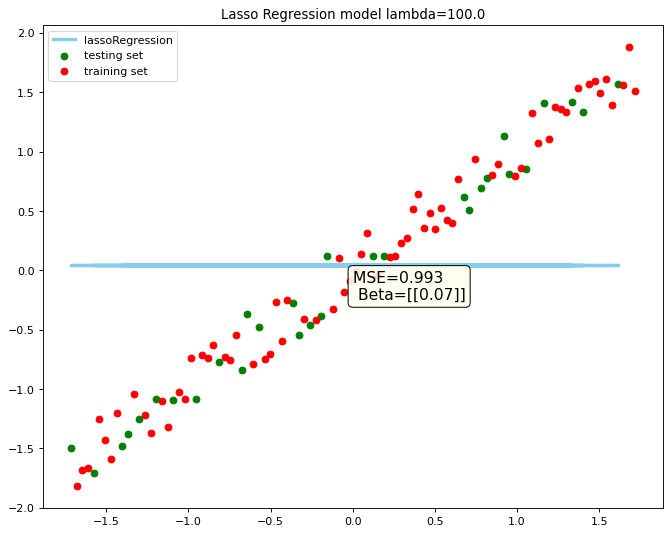

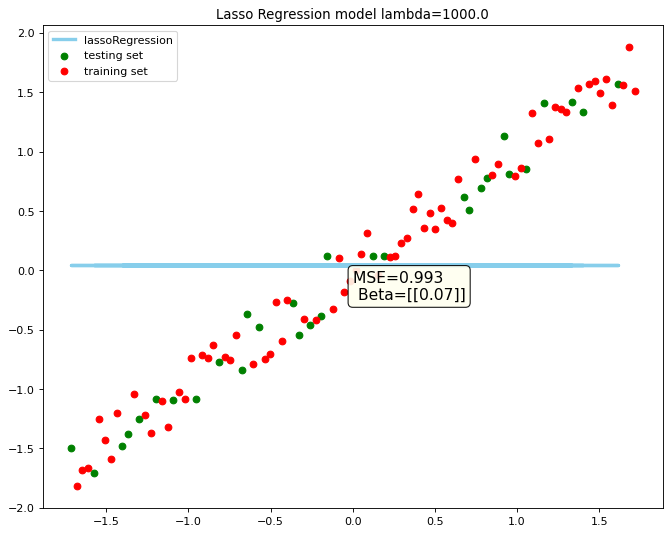

In [7]:
# Fit Lasso Regression (L1)
alpha_lasso = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_lasso)):
    #Costruisco ridge regression sul train-set
    lasso = lm.Lasso(alpha=alpha_lasso[i])
    lar=lasso.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = lar.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
    #print("lambda =", alpha_lasso[i])
    #print("R-squared =", metrics.r2_score(y_test, y_pred))
    #print("Coefficients =", lar.coef_)
    #print("Intercept =", lar.intercept_)

    #Traccio il grafico del modello
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X_test, y_test,  color='green')
    plt.scatter(X_train, y_train,  color='red')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=3)
    plt.title('Lasso Regression model lambda='+str(alpha_lasso[i]))
    plt.legend(['lassoRegression','testing set','training set'])
    
    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
    textstr = 'MSE='+str(mse)+' \n Beta='+str(beta)   
    plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Fit Elasticnet regression

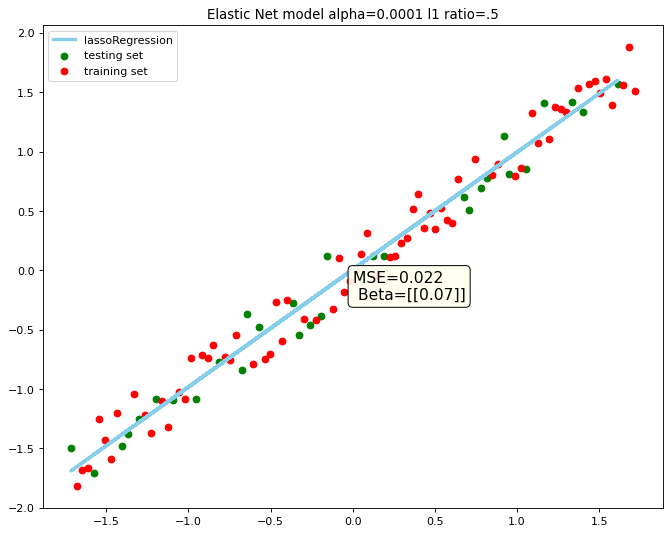

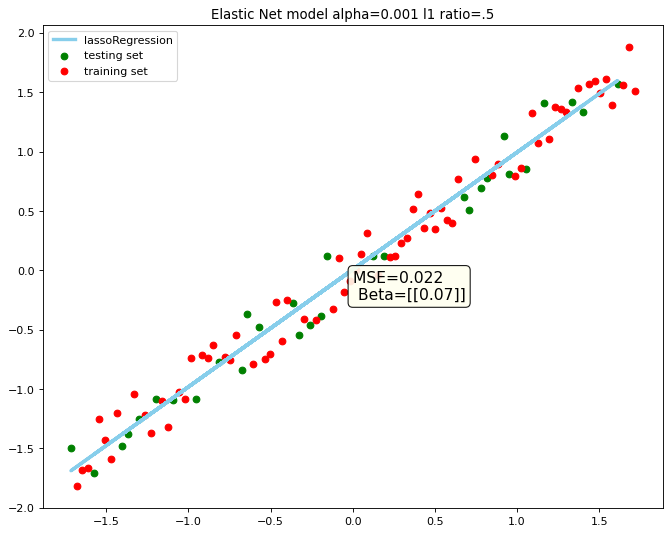

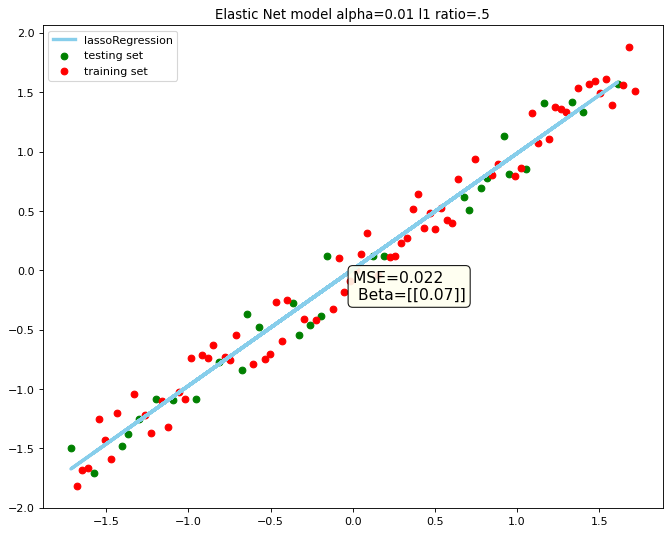

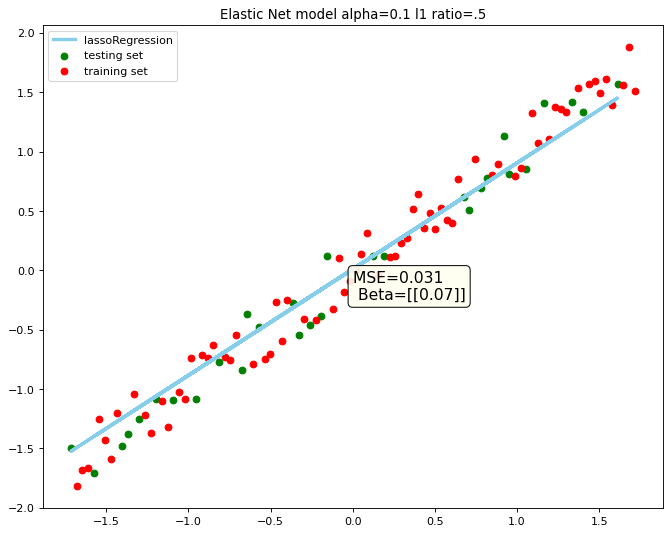

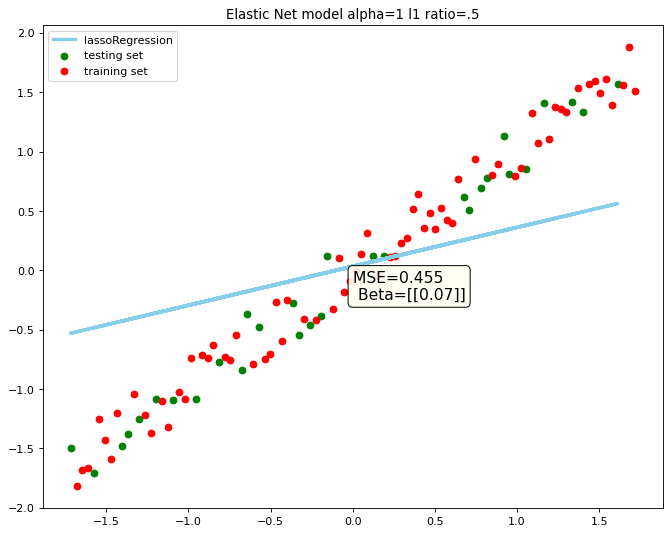

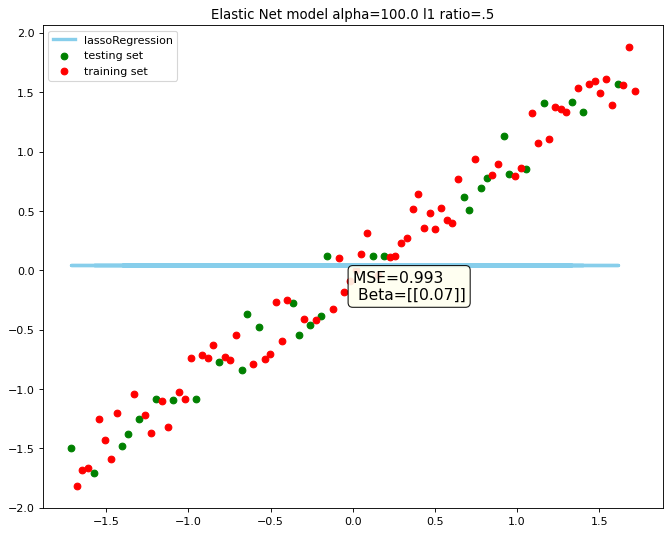

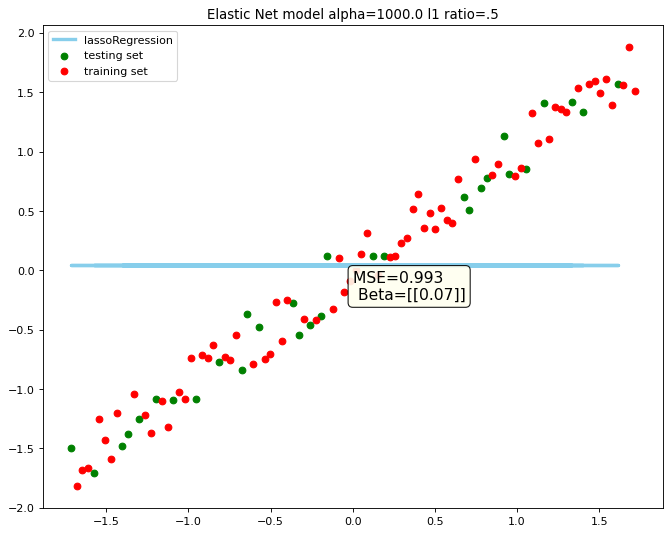

In [8]:
# Fit Elastic net Regression (L1)
alpha_en = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_lasso)):
    #Costruisco ridge regression sul train-set
    en = lm.ElasticNet(alpha=alpha_en[i], l1_ratio=0.5)
    lar=en.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = lar.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
   

    #Traccio il grafico del modello
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X_test, y_test,  color='green')
    plt.scatter(X_train, y_train,  color='red')
    plt.plot(X_test, y_pred, color='skyblue', linewidth=3)
    plt.title('Elastic Net model alpha='+str(alpha_en[i])+' l1 ratio=.5')
    plt.legend(['lassoRegression','testing set','training set'])
    
    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
    textstr = 'MSE='+str(mse)+' \n Beta='+str(beta)   
    plt.text(0, 0, textstr, fontsize=14, verticalalignment='top', bbox=props)

### Fit LARS

Text(0.1, -1, 'MSE=0.022 \n Beta=[0.99]')

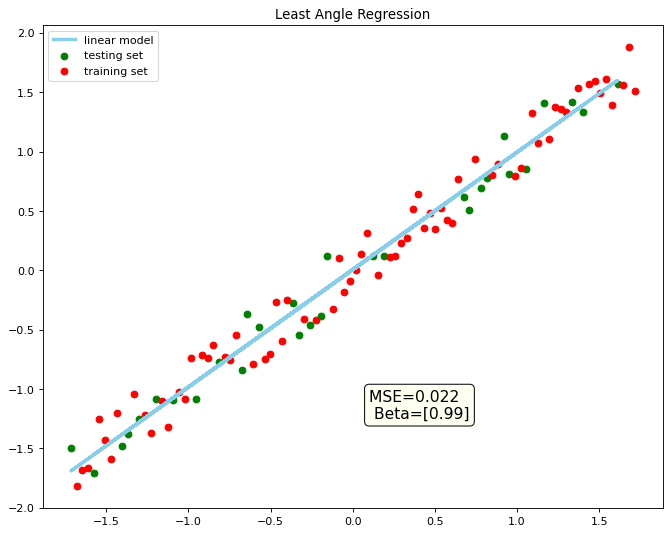

In [9]:
#Costruisco regressione lineare sul train-set
regr = lm.Lars()
lr=regr.fit(X_train, y_train)

#Testo la regressione lineare sul test-set
y_pred = lr.predict(X_test)
mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
beta=np.round(regr.coef_,2)



#Traccio il grafico del modello
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test,  color='green')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_test, y_pred, color='skyblue', linewidth=3)
plt.title('Least Angle Regression')
plt.legend(['linear model','testing set','training set'])

#evidenzio gli assi
#plt.grid()
#plt.axhline(linewidth=2, color='r') #evidenzio asse Ox
#plt.axvline(linewidth=2, color='r') #evidenzio asse Oy

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9)
textstr = 'MSE='+str(mse)+' \n Beta='+str(beta)   
plt.text(0.1, -1, textstr, fontsize=14, verticalalignment='top', bbox=props)

## 3-Dimensional Linear regression

### Define a sample

MEAN VALUE X: 62.72
STANDARD DEVIATION X: 24.62


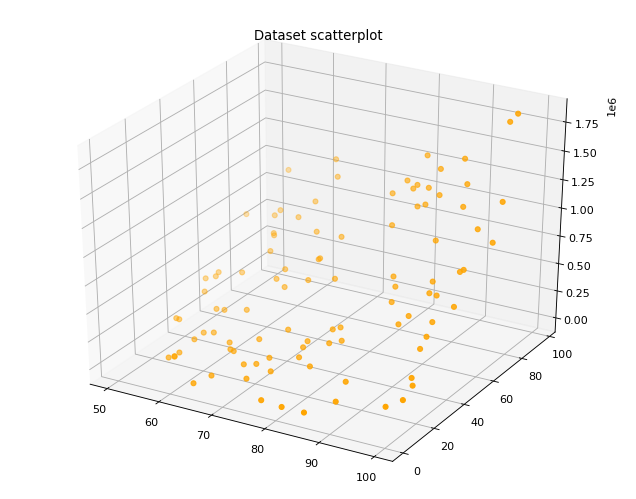

In [10]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

sampledim=100
testsize=0.1
xs = randrange(sampledim, 50, 100)
ys = randrange(sampledim, 0, 100)
zs = 2*xs*ys*ys +xs


X=[xs, ys]
y= zs

# print the sample
fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[0],X[1], y,  c='orange',marker='o')
plt.title(f"Dataset scatterplot")


#calculate mean and std of the input dataset
print('MEAN VALUE X: '+str(np.round(np.mean(X),2)))
print('STANDARD DEVIATION X: '+str(np.round(np.std(X),2)))

### Center and scale the sample

MEAN VALUE X: 0.0
STANDARD DEVIATION X: 1.0


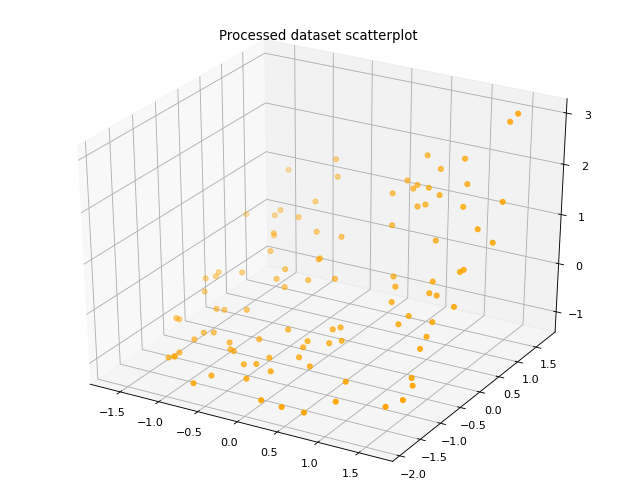

In [11]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled=np.vstack((preprocessing.scale(xs),preprocessing.scale(ys)))
X_scaled=np.transpose(X_scaled)

y_scaled = preprocessing.scale(y)
#X_scaled=np.transpose(X)
#y_scaled=y

fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_scaled[:,0], X_scaled[:,1], y_scaled,  c='orange',marker='o')
plt.title(f"Processed dataset scatterplot")

#calculate mean and std of the input dataset
print('MEAN VALUE X: '+str(np.round(np.mean(X_scaled),2)))
print('STANDARD DEVIATION X: '+str(np.round(np.std(X_scaled),2)))


### Define a training and testing set

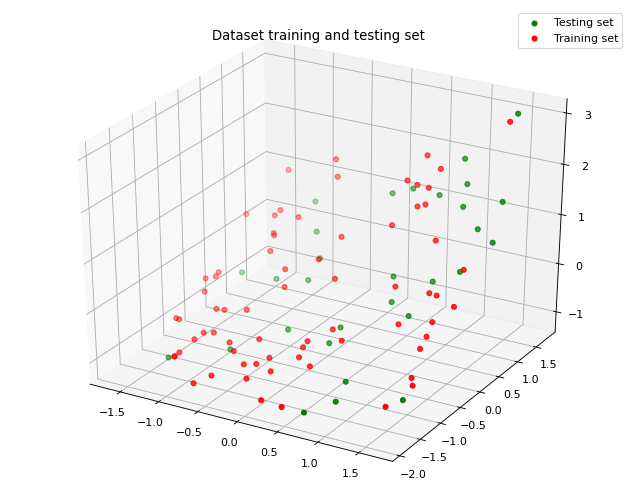

In [12]:
from sklearn.model_selection import train_test_split
testsize=0.30;

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=testsize, random_state=42)


fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')
plt.title('Dataset training and testing set')
plt.legend(["Testing set","Training set"])


### Fit Ordinary Least Squares

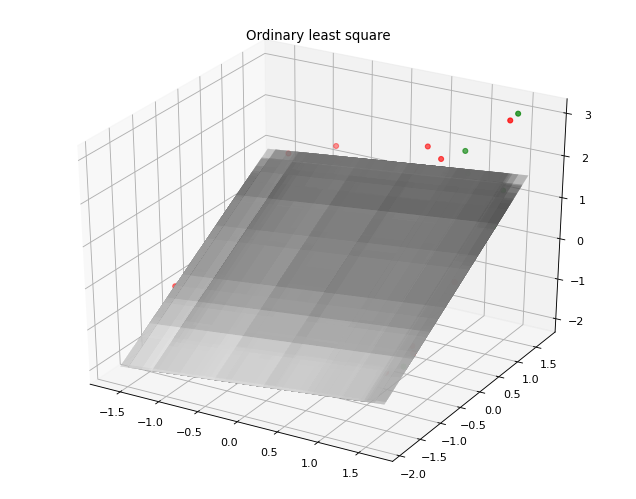

In [13]:
# Fit Ordinary Least Squares: OLS
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import pandas as pd

#Costruisco regressione lineare sul train-set
regr = lm.LinearRegression()
lr=regr.fit(X_train, y_train)

#Testo la regressione lineare sul test-set
y_pred = lr.predict(X_test)
mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
beta=np.round(regr.coef_,2)

#Traccio il grafico
fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

from matplotlib import cm

xx, yy = np.meshgrid(X_scaled[:,0], X_scaled[:,1])
exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out = lr.predict(exog)

plt.title('Ordinary least square')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')
ax.plot_surface(xx, yy, out.reshape(xx.shape),cmap='binary', alpha=0.1)

### Fit Ridge Regression

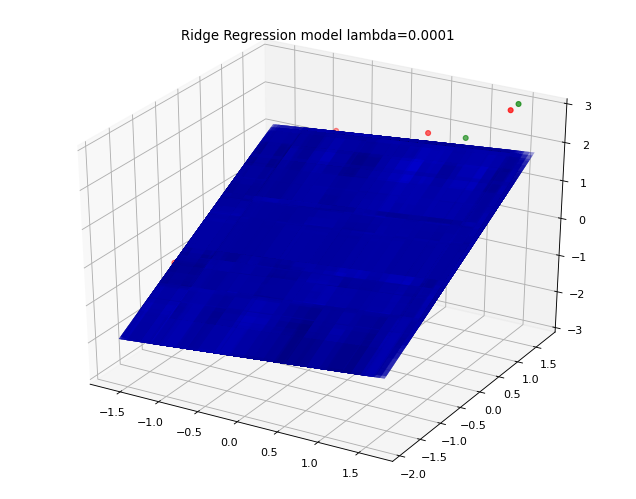

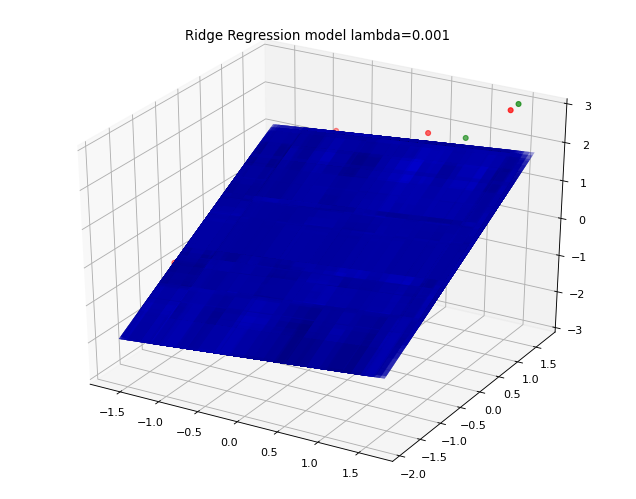

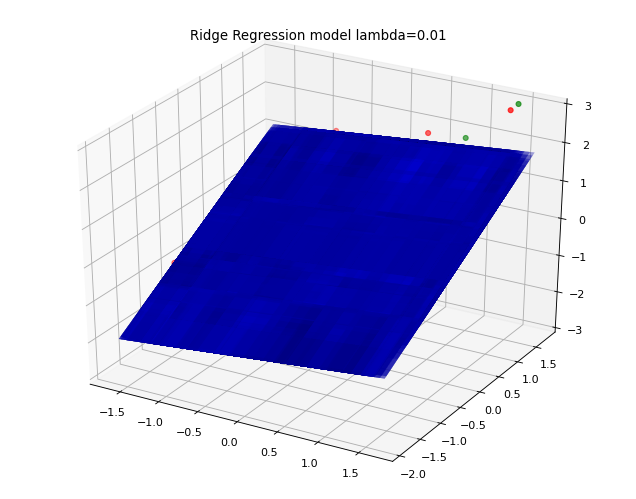

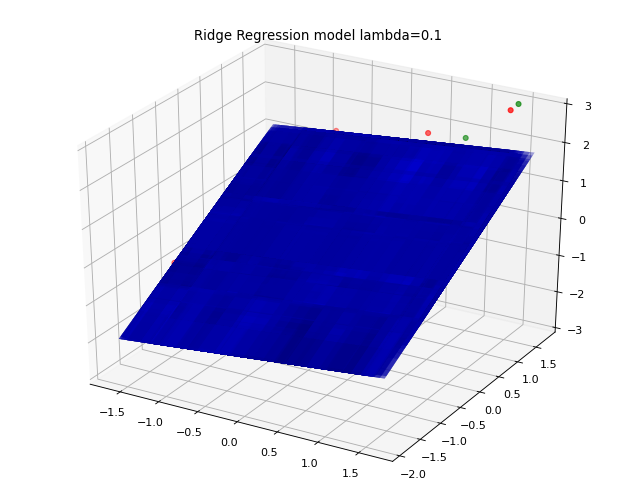

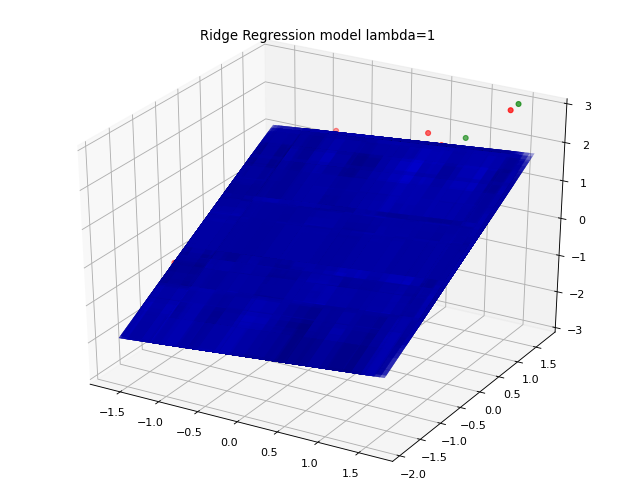

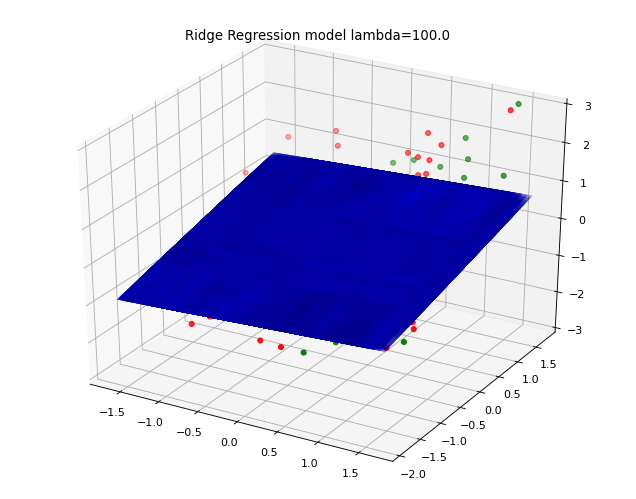

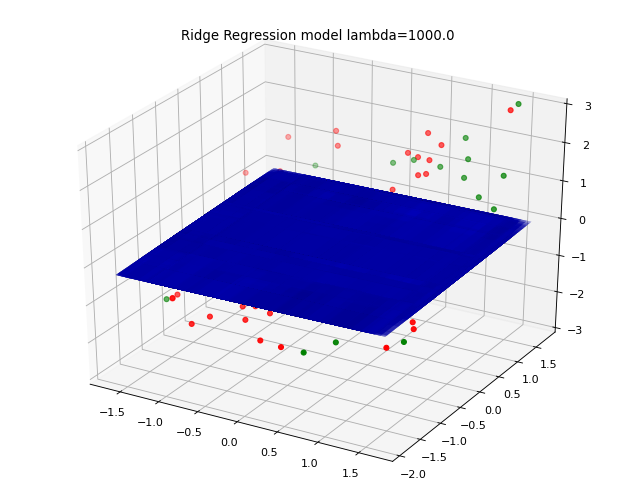

In [14]:
alpha_ridge = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_ridge)):
    #Costruisco ridge regression sul train-set
    ridge = lm.Ridge(alpha=alpha_ridge[i])
    rr=ridge.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = rr.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
    #print("lambda =", alpha_ridge[i])
    #print("R-squared =", r2)
    #print("Coefficients =", beta)
    

    #Traccio il grafico
    fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
    ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')


    xx, yy = np.meshgrid(X_scaled[:,0], X_scaled[:,1])
    exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
    out = rr.predict(exog)
    ax.plot_surface(xx, yy, out.reshape(xx.shape), color='blue', rstride=1,  cstride=1,alpha = 0.1)
    plt.title('Ridge Regression model lambda='+str(alpha_ridge[i]))
    ax.set_zlim3d(-3,3)

### Fit Lasso regression

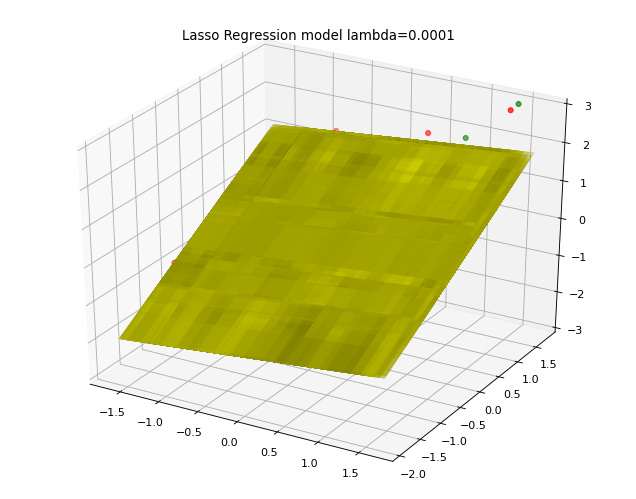

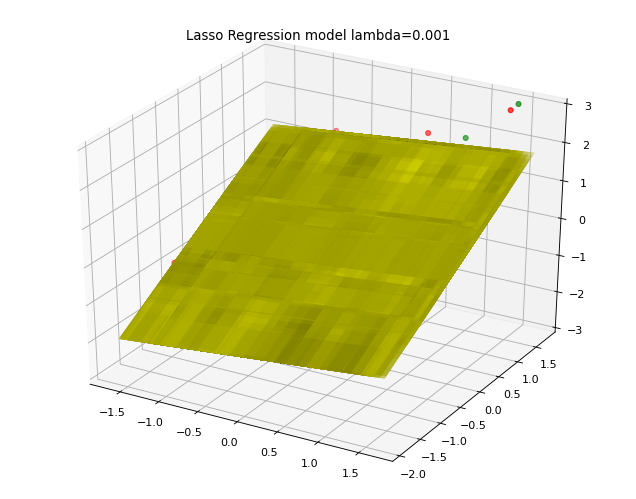

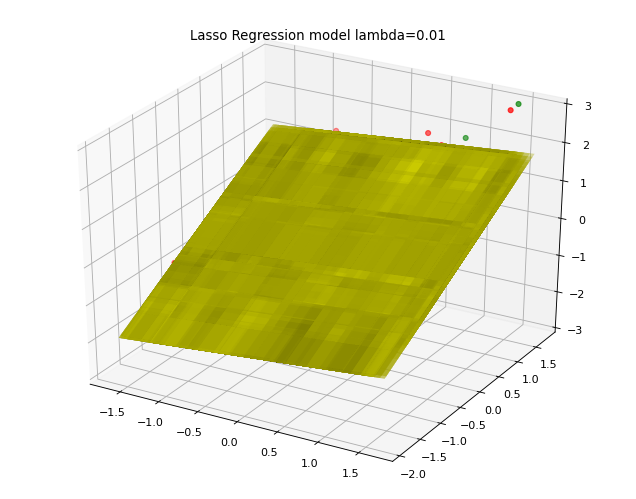

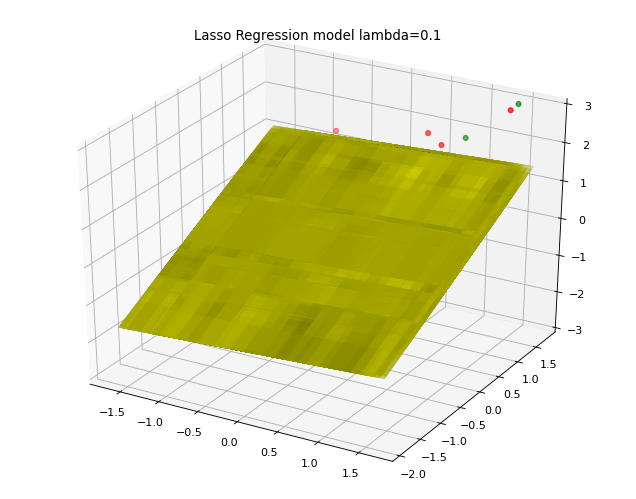

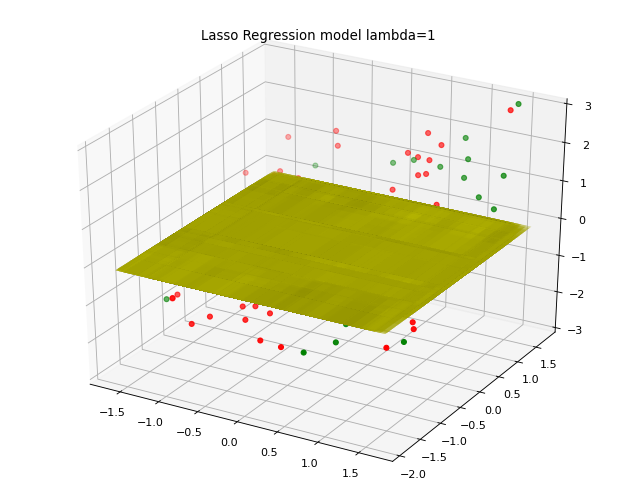

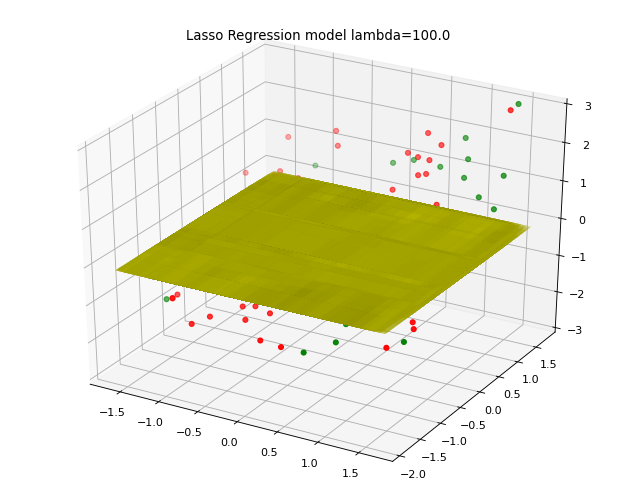

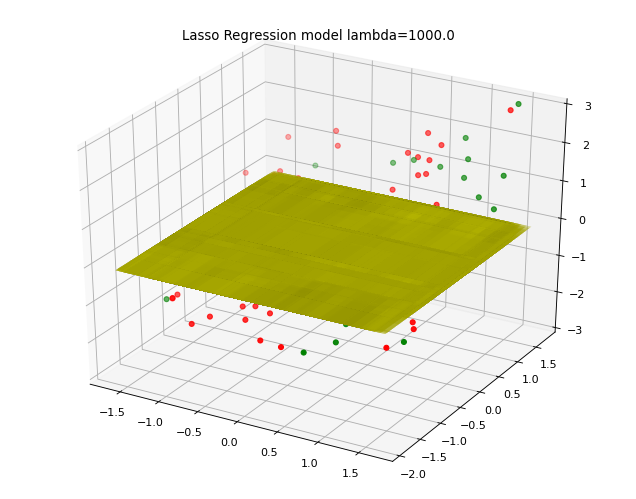

In [15]:
alpha_lasso = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_lasso)):
    #Costruisco ridge regression sul train-set
    lasso = lm.Lasso(alpha=alpha_lasso[i])
    lar=lasso.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = lar.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
    #print("lambda =", alpha_lasso[i])
    #print("R-squared =", metrics.r2_score(y_test, y_pred))
    #print("Coefficients =", lar.coef_)
    #print("Intercept =", lar.intercept_)

    #Traccio il grafico del modello
    fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
    ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')


    xx, yy = np.meshgrid(X_scaled[:,0], X_scaled[:,1])
    exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
    out = lar.predict(exog)
    ax.plot_surface(xx, yy, out.reshape(xx.shape), color='yellow', rstride=1,  cstride=1,alpha = 0.1)
    plt.title('Lasso Regression model lambda='+str(alpha_lasso[i]))
    ax.set_zlim3d(-3,3)

### Fit Elasticnet regression

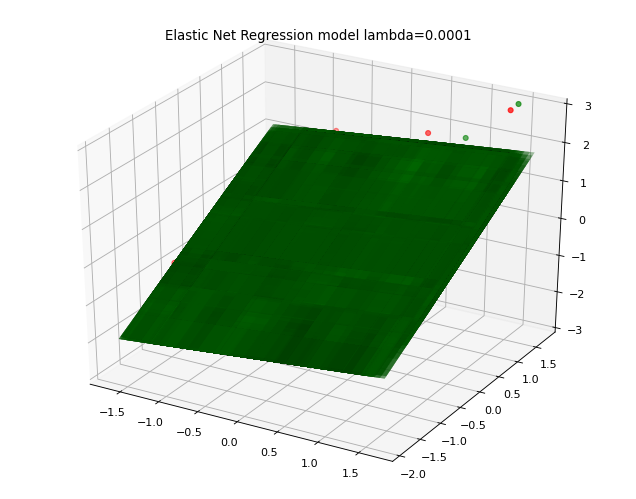

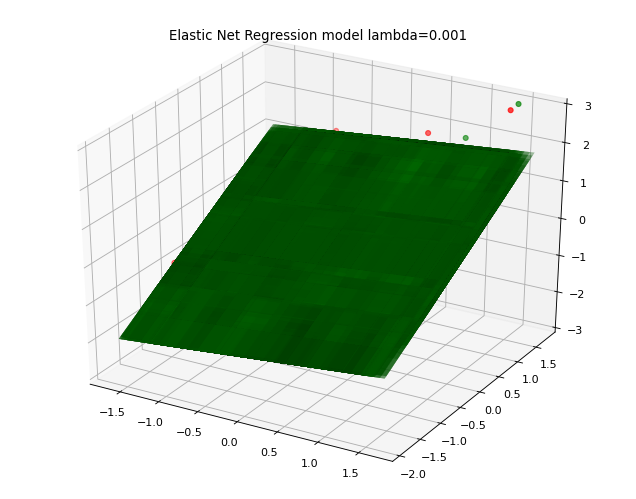

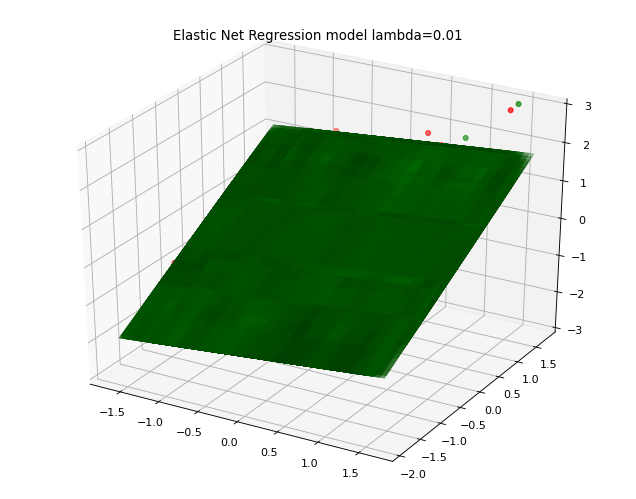

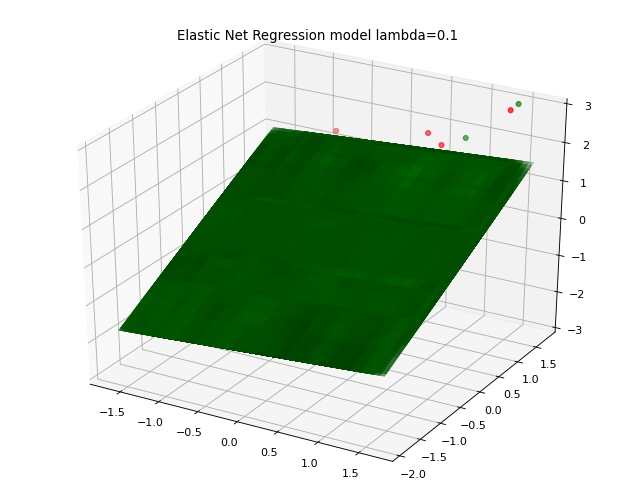

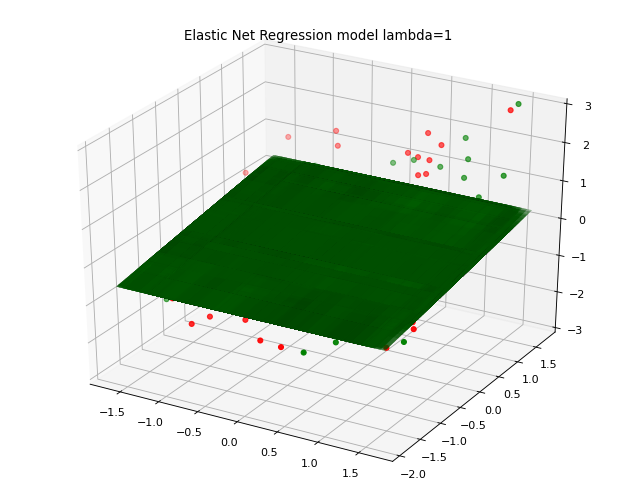

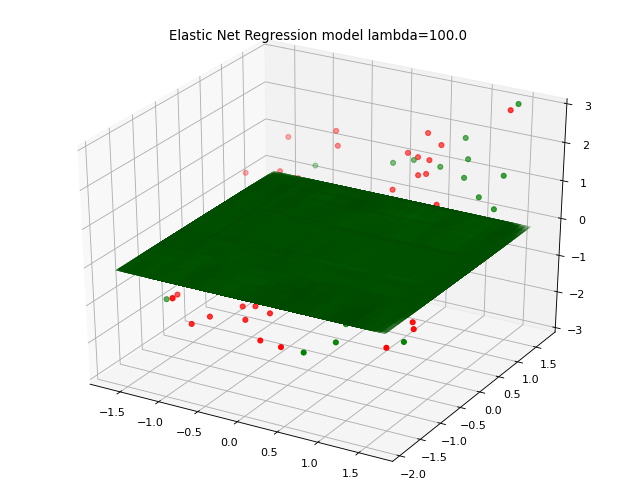

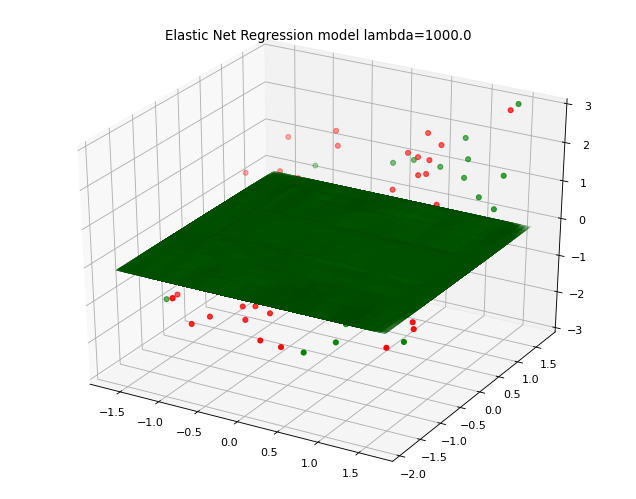

In [16]:
alpha_en = [1e-4, 1e-3, 1e-2,1e-1, 1, 1e2, 1e3]
for i in range(0,len(alpha_lasso)):
    #Costruisco ridge regression sul train-set
    en = lm.ElasticNet(alpha=alpha_en[i], l1_ratio=0.5)
    lar=en.fit(X_train, y_train)

    #Testo la ridge regression sul test-set
    y_pred = lar.predict(X_test)
    mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
    beta=np.round(ridge.coef_,2)
   

    #Traccio il grafico del modello
    fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
    ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')


    xx, yy = np.meshgrid(X_scaled[:,0], X_scaled[:,1])
    exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
    out = lar.predict(exog)
    ax.plot_surface(xx, yy, out.reshape(xx.shape), color='green', rstride=1,  cstride=1,alpha = 0.1)
    plt.title('Elastic Net Regression model lambda='+str(alpha_lasso[i]))
    ax.set_zlim3d(-3,3)

### Fit LARS

(-3.0, 3.0)

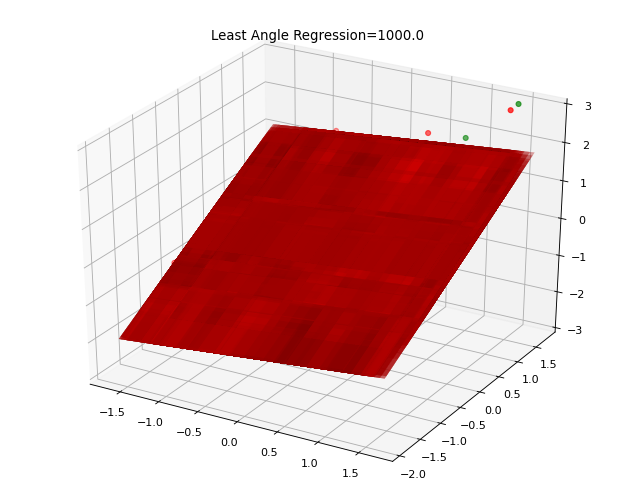

In [17]:
regr = lm.Lars()
lr=regr.fit(X_train, y_train)

#Testo la regressione lineare sul test-set
y_pred = lr.predict(X_test)
mse=np.round(metrics.mean_squared_error(y_test, y_pred),3)
beta=np.round(regr.coef_,2)



#Traccio il grafico del modello
fig=figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test,  c='g',marker='o')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train,  c='r',marker='o')


xx, yy = np.meshgrid(X_scaled[:,0], X_scaled[:,1])
exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out = lr.predict(exog)
ax.plot_surface(xx, yy, out.reshape(xx.shape), color='red', rstride=1,  cstride=1,alpha = 0.1)
plt.title('Least Angle Regression='+str(alpha_lasso[i]))
ax.set_zlim3d(-3,3)

## Hyperparameters gridsearch

In [18]:
# import models
import sys; sys.path.insert(0, '..') #add the above level with the package
from analogistics.learning.linear_grids import GridSearchLinear

grid_search_linear = GridSearchLinear()
df_results = grid_search_linear.train_models_regression(X_scaled, y)
df_results

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/5; 1/4] END fit_intercept=True, normalize=True;, score=-18822927648.740 total time=   0.0s
[CV 2/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/5; 1/4] END fit_intercept=True, normalize=True;, score=-13021296802.314 total time=   0.0s
[CV 3/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/5; 1/4] END fit_intercept=True, normalize=True;, score=-10461692773.241 total time=   0.0s
[CV 4/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/5; 1/4] END fit_intercept=True, normalize=True;, score=-28052625776.709 total time=   0.0s
[CV 5/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 5/5; 1/4] END fit_intercept=True, normalize=True;, score=-11956436634.489 total time=   0.0s
[CV 1/5; 2/4] START fit_intercept=True, normalize=

[CV 4/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-28052691339.758 total time=   0.0s
[CV 5/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 5/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-11956394213.804 total time=   0.0s
[CV 1/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 1/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-258928897732.766 total time=   0.0s
[CV 2/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 2/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-240449889484.028 total time=   0.0s
[CV 3/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 3/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-236584057215.278 total time=   0.0s
[CV 4/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 4/5; 7/36] END alpha=0.

[CV 4/5; 18/36] END alpha=0.1, fit_intercept=True, normalize=False;, score=-28118598738.706 total time=   0.0s
[CV 5/5; 18/36] START alpha=0.1, fit_intercept=True, normalize=False............
[CV 5/5; 18/36] END alpha=0.1, fit_intercept=True, normalize=False;, score=-11914778743.666 total time=   0.0s
[CV 1/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 1/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-258608980446.821 total time=   0.0s
[CV 2/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 2/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-240392050361.134 total time=   0.0s
[CV 3/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 3/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-236756396271.524 total time=   0.0s
[CV 4/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 4/5; 19/36] END alpha=0.1, fit_in

[CV 1/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-84699586414.186 total time=   0.0s
[CV 2/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 2/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-70485956417.625 total time=   0.0s
[CV 3/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 3/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-64490533949.737 total time=   0.0s
[CV 4/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 4/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-115854507133.200 total time=   0.0s
[CV 5/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 5/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-80344364641.461 total time=   0.0s
[CV 1/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 1/5; 31/36] END alpha=100

[CV 2/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-13021296769.256 total time=   0.0s
[CV 3/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 3/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-10461692858.000 total time=   0.0s
[CV 4/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 4/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-28052625913.616 total time=   0.0s
[CV 5/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 5/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-11956436518.302 total time=   0.0s
[CV 1/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 1/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-258929218979.096 total time=   0.0s
[CV 2/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 2/5; 11/36] END alpha=0.0

[CV 2/5; 23/36] START alpha=1, fit_intercept=False, normalize=True..............
[CV 2/5; 23/36] END alpha=1, fit_intercept=False, normalize=True;, score=-240449789674.848 total time=   0.0s
[CV 3/5; 23/36] START alpha=1, fit_intercept=False, normalize=True..............
[CV 3/5; 23/36] END alpha=1, fit_intercept=False, normalize=True;, score=-236584156512.043 total time=   0.0s
[CV 4/5; 23/36] START alpha=1, fit_intercept=False, normalize=True..............
[CV 4/5; 23/36] END alpha=1, fit_intercept=False, normalize=True;, score=-325075721031.172 total time=   0.0s
[CV 5/5; 23/36] START alpha=1, fit_intercept=False, normalize=True..............
[CV 5/5; 23/36] END alpha=1, fit_intercept=False, normalize=True;, score=-246443883248.855 total time=   0.0s
[CV 1/5; 24/36] START alpha=1, fit_intercept=False, normalize=False.............
[CV 1/5; 24/36] END alpha=1, fit_intercept=False, normalize=False;, score=-258928770643.727 total time=   0.0s
[CV 2/5; 24/36] START alpha=1, fit_intercept

[CV 4/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-28054396275.204 total time=   0.0s
[CV 5/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 5/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-11955291810.917 total time=   0.0s
[CV 1/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 1/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-258920694857.191 total time=   0.0s
[CV 2/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 2/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-240448400518.663 total time=   0.0s
[CV 3/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 3/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-236588544877.705 total time=   0.0s
[CV 4/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 4/5; 7/36] END alpha=0.

[CV 2/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-154188383409.011 total time=   0.0s
[CV 3/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 3/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-134361635341.403 total time=   0.0s
[CV 4/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 4/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-210830604363.454 total time=   0.0s
[CV 5/5; 30/36] START alpha=100.0, fit_intercept=True, normalize=False..........
[CV 5/5; 30/36] END alpha=100.0, fit_intercept=True, normalize=False;, score=-178788733679.841 total time=   0.0s
[CV 1/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 1/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-282297213192.358 total time=   0.0s
[CV 2/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 2/5; 31/36] END alpha

MODEL_NAME                              MODEL  \
0      regr_linear                 LinearRegression()   
0       regr_ridge  Ridge(alpha=0.01, normalize=True)   
0       regr_lasso                 Lasso(alpha=100.0)   
0  regr_elasticnet             ElasticNet(alpha=0.01)   
0        regr_lars              Lars(normalize=False)   

                                              PARAMS    SCORE_TEST  \
0        {'fit_intercept': True, 'normalize': False} -1.646300e+10   
0  {'alpha': 0.01, 'fit_intercept': True, 'normal... -1.645530e+10   
0  {'alpha': 100.0, 'fit_intercept': True, 'norma... -1.646295e+10   
0  {'alpha': 0.01, 'fit_intercept': True, 'normal... -1.645118e+10   
0        {'fit_intercept': True, 'normalize': False} -1.646300e+10   

   SCORE_VALIDATION  
0     -2.242599e+10  
0     -2.292215e+10  
0     -2.244615e+10  
0     -2.267004e+10  
0     -2.242599e+10